In [10]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as mpl
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 8)

# pd.options.mode.chained_assignment = None

In [11]:
# read the data
df = pd.read_csv('sberbank.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)
df.head()

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [12]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
number_cols = df_numeric.columns.values
print(number_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Missing data
### - Technique #1 : Missing Data Heatmap

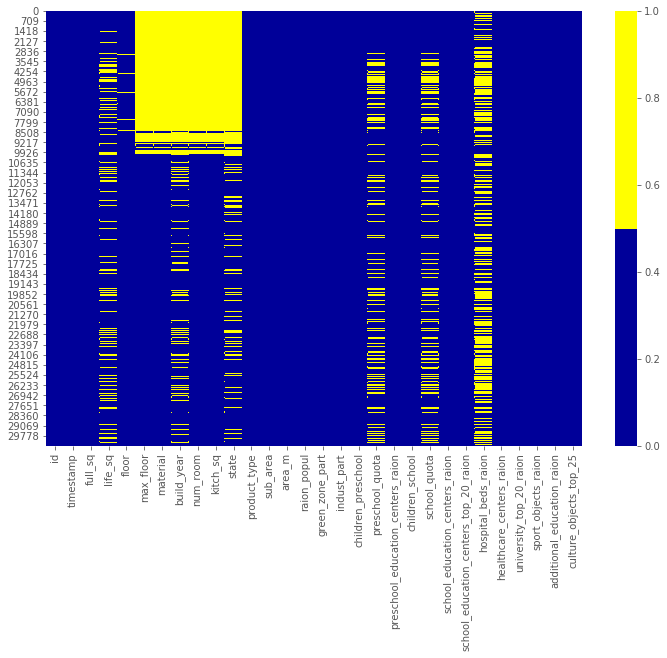

In [13]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

### - Technique #2: Missing Data Percentage List

In [14]:
# if it's a larger dataset and the visualization takes too long can do this
# % of missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

### Technique #3: Missing Data Histogram

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

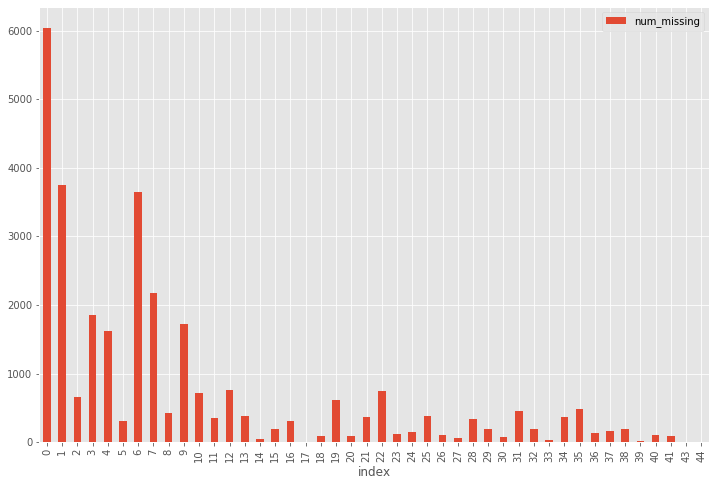

In [15]:
# first create missing indicator for feature with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing');

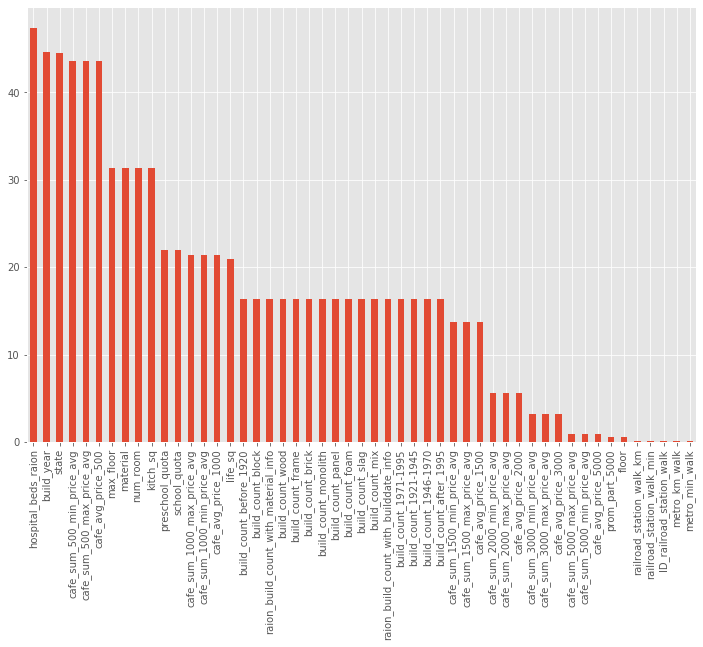

In [27]:
missing_pct = dict()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0:
        missing_pct[col] = pct_missing*100
        
missing_pct = pd.Series(missing_pct)
missing_pct.sort_values(ascending=False).plot.bar(x='column', y='missing pct (%)')

### - Solution #1: Drop the Observation

In [18]:
# drop rows with a lot of missing values
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

### - Solution #2: Drop the Feature

In [29]:
# hostpital_beds_raion has a lot of missing
# If we want to drop
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

### - Solution #3: Impute the Missing

In [30]:
# replace missing values with the median
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


In [32]:
# impute the missing values and create the missing value indicator variables for each numeric column
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values
        print('imputing missing values for: {}'.format(col))
        df['{}_missing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

In [33]:
# impute the missing values and create the missing value indicator variables for each non-numeric column
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values
        print('imputing missing value for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value
        df[col] = df[col].fillna(top)

### Solution #4: Replace the Missing

In [34]:
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

## Irregular data (Outliers)
- Outliers are data that is distinctively different from other observations. They coul be read outliers or mistakes

### How to find out?

### - Technique #1: Hostogram/Box Plot

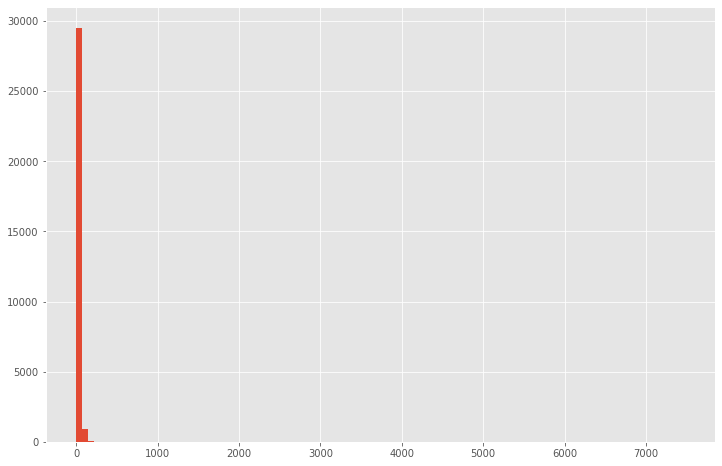

In [35]:
# histogram of life_sq
df['life_sq'].hist(bins=100);

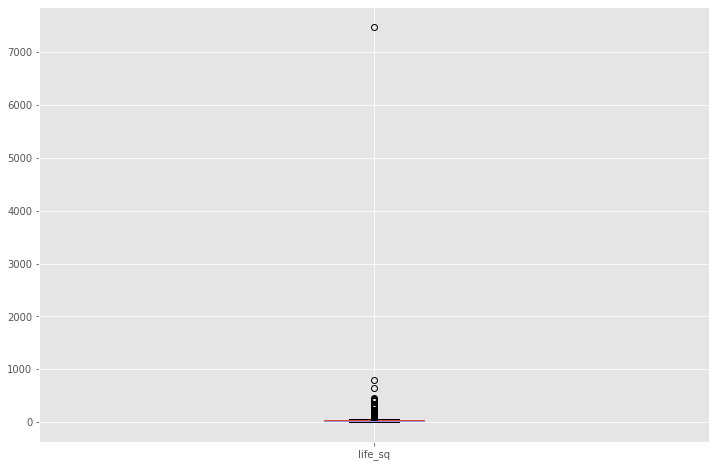

In [36]:
# box plot
df.boxplot(column=['life_sq']);

### - Technique #2: Descriptive Statistics

In [39]:
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

### - Technique #3: Bar Chart

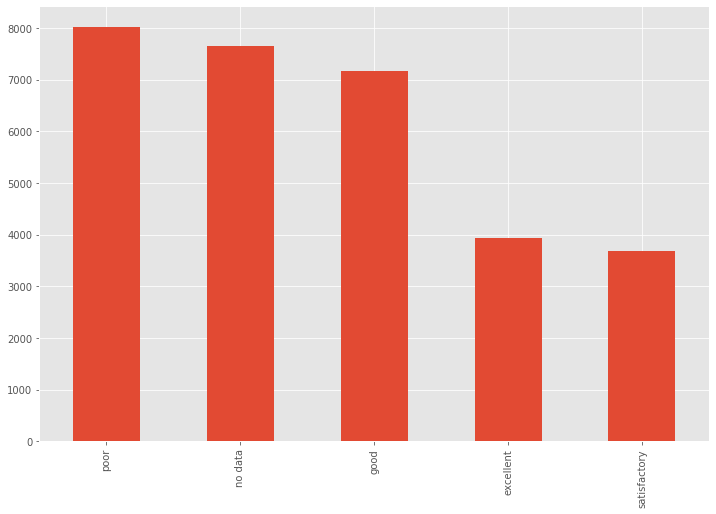

In [42]:
# bar char - distribution of a categorical variable
df['ecology'].value_counts().plot.bar();

## Unnecessary data
### - Unnecessary type #1: Uninformative / Repetitive

In [44]:
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosque_count_

### - Unnecessary type #2: Irrelevant
- If the features are not related to the question we are trying to solve in the project, they are irrelevant

### - Unnecessary type #3: Duplicates
- Duplicates type #1: All Feature based

In [45]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 394)
(30461, 393)


- Duplicates tpe #2: Key Features based

In [47]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   1979.0      2.0       8248500      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2013-04-03  42       30.0     2.0    1979.0      2.0       3444000      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-05-22  68       30.0     2.0    1979.0      2.0       5406690      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2012-09-05  43       30.0     21.0   1979.0      2.0       6229540      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2013-06-24  40       30.0     12.0   1979.0

In [48]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 394)
(30455, 394)


## Inconsistent data
### - Inconsistent type #1: Capitalization

In [49]:
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

In [50]:
# make everything lower case
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

### - Inconsistent type #2: Formats

In [51]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_sum_2000_max_price_avg_missing,cafe_avg_price_2000_missing,cafe_sum_3000_min_price_avg_missing,cafe_sum_3000_max_price_avg_missing,cafe_avg_price_3000_missing,prom_part_5000_missing,cafe_sum_5000_min_price_avg_missing,cafe_sum_5000_max_price_avg_missing,cafe_avg_price_5000_missing,sub_area_lower
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,bibirevo
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,nagatinskij zaton
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,tekstil'shhiki
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,mitino
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,basmannoe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,otradnoe
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,False,False,False,False,False,False,False,False,False,tverskoe
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,1979.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,poselenie vnukovskoe
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,False,False,False,False,False,False,False,False,False,obruchevskoe


In [54]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


### Inconsistent type #3: Categorical Values

In [57]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'toronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})

df_city_ex['city_distance_toronto'] = df_city_ex['city'].apply(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].apply(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,toronto,0,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


In [58]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,0,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


### - Inconsistent type #4: Address

In [59]:
# no address column in the housing dataset. So create one to show the code.
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


In [60]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
